## Vehicle dataset from cardekho
Used Cars data form cardekho
[car data](https://raw.githubusercontent.com/aravind-naidu/ML-Workshop/master/Dataset/car%20data.csv)

### This dataset contains information about used cars listed on www.cardekho.com
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.


## Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Lets Start


In [2]:
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [3]:
car= pd.read_csv("https://raw.githubusercontent.com/aravind-naidu/ML-Workshop/master/Dataset/car%20data.csv")
car.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
car.shape

(301, 9)

In [5]:
car.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  ...  Seller_Type  Transmission Owner
0       ritz  2014           3.35  ...       Dealer        Manual     0
1        sx4  2013           4.75  ...       Dealer        Manual     0
2       ciaz  2017           7.25  ...       Dealer        Manual     0
3    wagon r  2011           2.85  ...       Dealer        Manual     0
4      swift  2014           4.60  ...       Dealer        Manual     0
..       ...   ...            ...  ...          ...           ...   ...
296     city  2016           9.50  ...       Dealer        Manual     0
297     brio  2015           4.00  ...       Dealer        Manual     0
298     city  2009           3.35  ...       Dealer        Manual     0
299     city  2017          11.50  ...       Dealer        Manual     0
300     brio  2016           5.30  ...       Dealer        Manual     0

[301 rows x 9 columns]>

In [6]:
car['car_age']= 2020-car['Year']

In [7]:
car.drop('Year',axis=1,inplace=True)

In [8]:
car.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Visualization with Target variable

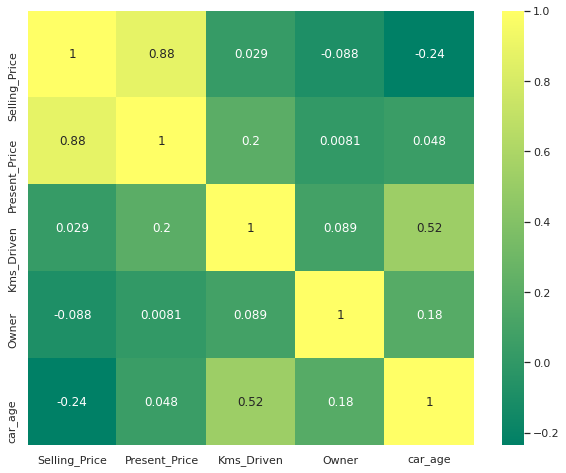

In [9]:
fig = plt.figure(figsize=(10,8))
car_corr = car.corr()
sns.heatmap(car_corr,annot=True,cmap='summer')

In [10]:
car.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'car_age'],
      dtype='object')

## Visualizing several plots at a time

Text(0.5, 1.0, 'Present Price')

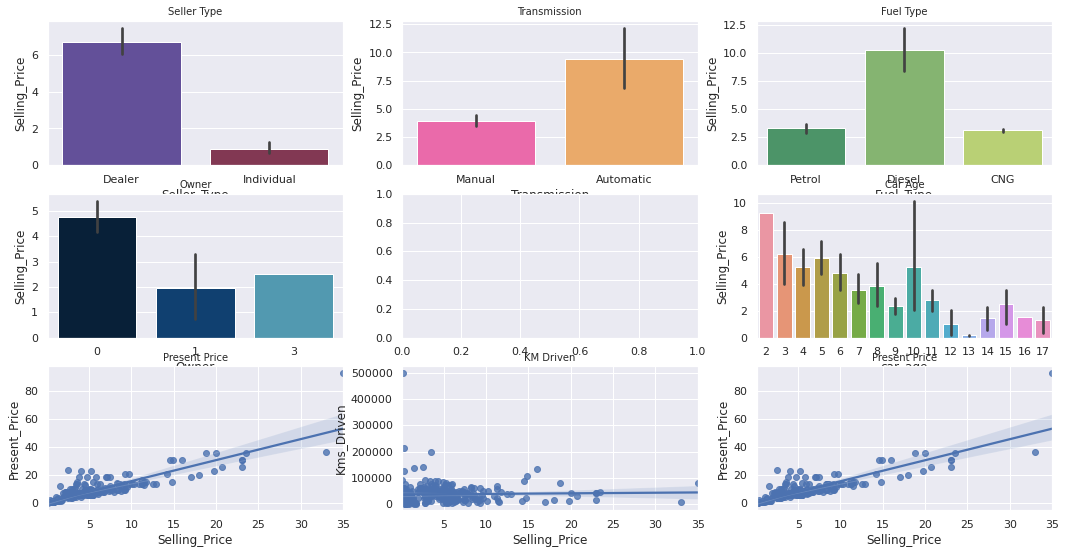

In [11]:
fig = plt.figure(figsize=(18,9))

plt.subplot(3,3,1)
sns.barplot('Seller_Type','Selling_Price',data=car,palette='twilight')
plt.title('Seller Type', fontsize=10)

plt.subplot(3,3,2)
sns.barplot('Transmission','Selling_Price',data=car,palette='spring')
plt.title('Transmission', fontsize=10)

plt.subplot(3,3,3)
sns.barplot('Fuel_Type','Selling_Price',data=car,palette='summer')
plt.title('Fuel Type', fontsize=10)

plt.subplot(3,3,4)
sns.barplot('Owner','Selling_Price',data=car,palette='ocean')
plt.title('Owner', fontsize=10)


plt.subplot(3,3,5)

plt.subplot(3,3,6)
sns.barplot('car_age','Selling_Price',data=car) 
plt.title('Car Age', fontsize=10)

plt.subplot(3,3,7)
sns.regplot('Selling_Price','Present_Price',data=car)
plt.title('Present Price', fontsize=10)

plt.subplot(3,3,8)
sns.regplot('Selling_Price','Kms_Driven',data=car)
plt.title('KM Driven', fontsize=10)

plt.subplot(3,3,9)
sns.regplot('Selling_Price','Present_Price',data=car)
plt.title('Present Price', fontsize=10)


## Dealing With Categorical Variables

In [12]:
car.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'car_age'],
      dtype='object')

In [13]:
fuel = pd.get_dummies(car['Fuel_Type'])
transmission = pd.get_dummies(car['Transmission'],drop_first=True)
seller= pd.get_dummies(car['Seller_Type'],drop_first=True)

In [14]:
fuel.drop('CNG',axis=1,inplace=True)

In [15]:
car= pd.concat([car,fuel,transmission,seller],axis=1)

In [16]:
car.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Diesel,Petrol,Manual,Individual
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,1,1,0
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,1,0,1,0
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,1,1,0
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,1,1,0
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,1,0,1,0


In [17]:
car.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1,inplace=True)

In [18]:
#The column car name doesn't seem to add much value to our analysis and hence dropping the column

car= car.drop('Car_Name',axis=1)

In [19]:
car.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Diesel,Petrol,Manual,Individual
0,3.35,5.59,27000,0,6,0,1,1,0
1,4.75,9.54,43000,0,7,1,0,1,0
2,7.25,9.85,6900,0,3,0,1,1,0
3,2.85,4.15,5200,0,9,0,1,1,0
4,4.60,6.87,42450,0,6,1,0,1,0


## Dividing dataset into Features(X) and Target(y)

In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car, test_size = 0.3, random_state = 100)

In [21]:
num_vars=['Selling_Price','Present_Price','Kms_Driven']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [23]:
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_test[num_vars]= scaler.transform(df_test[num_vars])

In [24]:
df_train.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Diesel,Petrol,Manual,Individual
156,-0.820023,-0.787736,-0.556284,0,3,0,1,1,1
98,0.478525,1.156937,0.131253,0,7,0,1,1,0
276,0.794762,0.618363,-0.331688,0,5,0,1,1,0
203,-0.331832,-0.349136,0.325138,0,9,0,1,1,0
123,-0.717246,-0.685611,0.165630,0,7,0,1,1,1
